In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=198b8f835424a8854d9cfc15267934ee


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ornskoldsvik
Processing Record 2 of Set 1 | atasu
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | vardo
Processing Record 5 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 1 | russkaya polyana
Processing Record 7 of Set 1 | sistranda
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | port hardy
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | rocha
Processing Record 16 of Set 1 | matamoros
Processing Record 17 of Set 1 | bestobe
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | port hedland
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | shingu
Processing Record 22 of Set 1 | taolanaro
City no

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ornskoldsvik,63.2909,18.7153,46.22,87,100,4.32,SE,2021-05-31 22:14:42
1,Atasu,48.6814,71.6433,68.59,49,84,6.71,KZ,2021-05-31 22:14:42
2,Albany,42.6001,-73.9662,68.31,60,66,6.62,US,2021-05-31 22:13:44
3,Vardo,70.3705,31.1107,41.20,86,100,13.11,NO,2021-05-31 22:14:43
4,Russkaya Polyana,49.4170,31.9201,48.52,76,100,11.25,UA,2021-05-31 22:14:43
5,Sistranda,63.7256,8.8340,49.96,89,100,14.76,NO,2021-05-31 22:14:43
6,Busselton,-33.6500,115.3333,51.08,89,51,7.96,AU,2021-05-31 22:09:47
7,Port Hardy,50.6996,-127.4199,61.59,77,100,3.56,CA,2021-05-31 22:14:45
8,Port Elizabeth,-33.9180,25.5701,51.10,79,21,13.27,ZA,2021-05-31 22:14:23
9,Kapaa,22.0752,-159.3190,85.12,73,90,1.01,US,2021-05-31 22:14:16


In [11]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ornskoldsvik,SE,2021-05-31 22:14:42,63.2909,18.7153,46.22,87,100,4.32
1,Atasu,KZ,2021-05-31 22:14:42,48.6814,71.6433,68.59,49,84,6.71
2,Albany,US,2021-05-31 22:13:44,42.6001,-73.9662,68.31,60,66,6.62
3,Vardo,NO,2021-05-31 22:14:43,70.3705,31.1107,41.20,86,100,13.11
4,Russkaya Polyana,UA,2021-05-31 22:14:43,49.4170,31.9201,48.52,76,100,11.25
5,Sistranda,NO,2021-05-31 22:14:43,63.7256,8.8340,49.96,89,100,14.76
6,Busselton,AU,2021-05-31 22:09:47,-33.6500,115.3333,51.08,89,51,7.96
7,Port Hardy,CA,2021-05-31 22:14:45,50.6996,-127.4199,61.59,77,100,3.56
8,Port Elizabeth,ZA,2021-05-31 22:14:23,-33.9180,25.5701,51.10,79,21,13.27
9,Kapaa,US,2021-05-31 22:14:16,22.0752,-159.3190,85.12,73,90,1.01


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1622499489.8057191

In [15]:
today = time.strftime('%x')
today

'05/31/21'

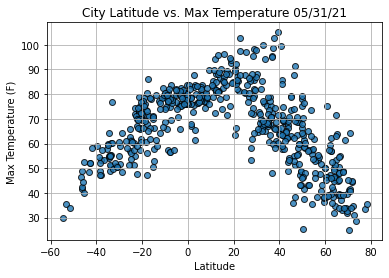

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

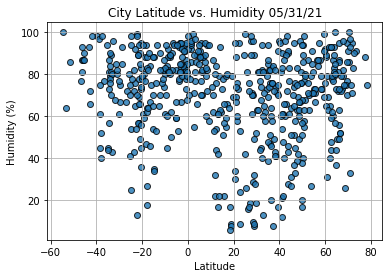

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

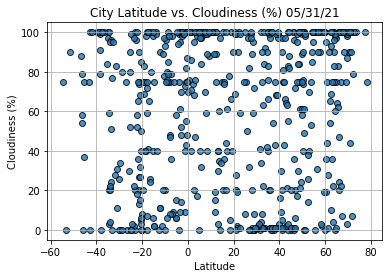

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

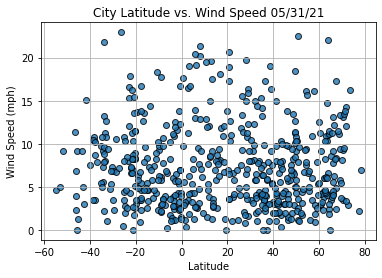

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ornskoldsvik,SE,2021-05-31 22:14:42,63.2909,18.7153,46.22,87,100,4.32
1,Atasu,KZ,2021-05-31 22:14:42,48.6814,71.6433,68.59,49,84,6.71
2,Albany,US,2021-05-31 22:13:44,42.6001,-73.9662,68.31,60,66,6.62
3,Vardo,NO,2021-05-31 22:14:43,70.3705,31.1107,41.20,86,100,13.11
4,Russkaya Polyana,UA,2021-05-31 22:14:43,49.4170,31.9201,48.52,76,100,11.25
...,...,...,...,...,...,...,...,...,...
548,Manacor,ES,2021-05-31 22:18:08,39.5696,3.2096,71.38,75,100,5.35
549,Maple Creek,CA,2021-05-31 22:18:08,49.9168,-109.4848,79.29,20,58,10.36
551,Aklavik,CA,2021-05-31 22:12:39,68.2191,-135.0107,33.80,75,90,11.50
553,Uthal,PK,2021-05-31 22:18:10,25.8072,66.6219,83.88,81,50,7.54


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ornskoldsvik,SE,2021-05-31 22:14:42,63.2909,18.7153,46.22,87,100,4.32
1,Atasu,KZ,2021-05-31 22:14:42,48.6814,71.6433,68.59,49,84,6.71
2,Albany,US,2021-05-31 22:13:44,42.6001,-73.9662,68.31,60,66,6.62
3,Vardo,NO,2021-05-31 22:14:43,70.3705,31.1107,41.20,86,100,13.11
4,Russkaya Polyana,UA,2021-05-31 22:14:43,49.4170,31.9201,48.52,76,100,11.25


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

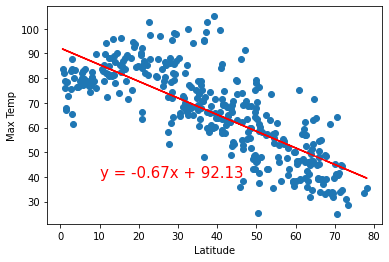

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

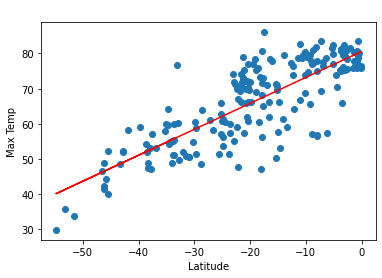

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

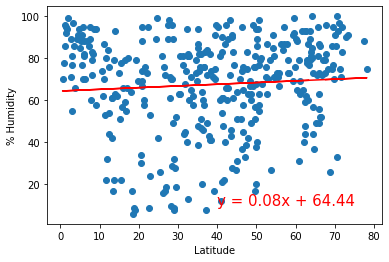

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

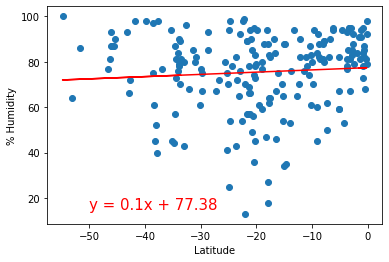

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

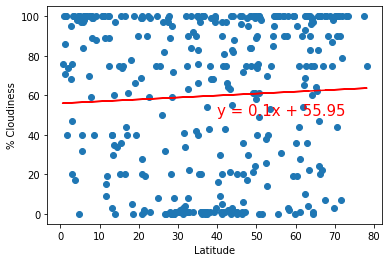

In [29]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,50))

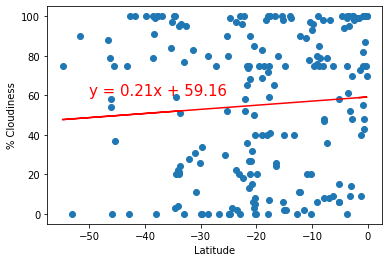

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

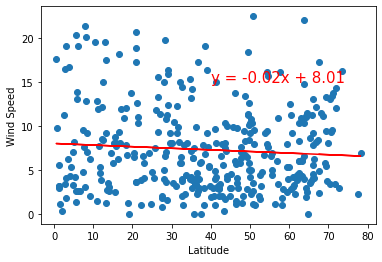

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,15))

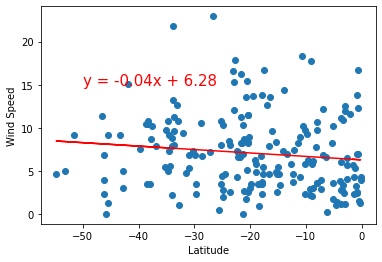

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))